In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
t_final = 4000
t_initial = 0
delta_t = 0.001
time = np.arange(t_initial, t_final , delta_t)

In [3]:
X1=np.loadtxt('1D_diffusion.dat')

In [4]:

from kmc import KM
bins = np.array([900])
powers = np.array([[0], [1], [2], [3], [4], [5], [6]])
moments,edge=KM(X1, powers = powers,bins=bins,correction=True)

In [5]:
from kramersmoyal import km
bins = np.array([900])
powers = np.array([[0], [1], [2], [3], [4], [5], [6]])
bw =None
kmc, edges = km(X1, bw=bw, bins=bins, powers=powers)

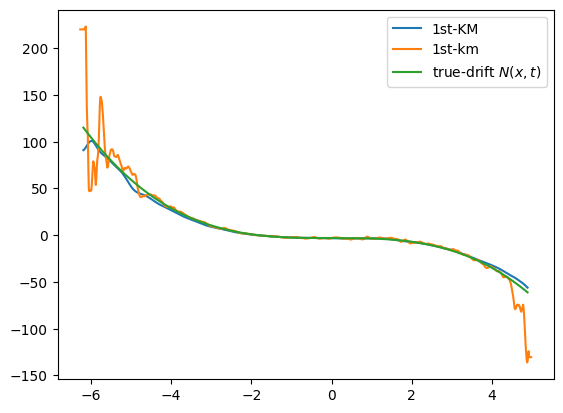

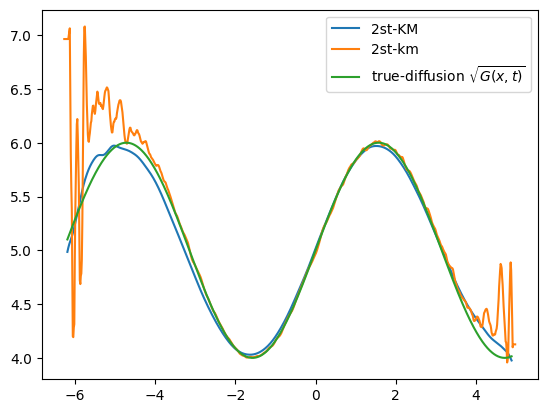

In [6]:

delta_t1=0.001
edgee=np.squeeze(edge)
edgess=np.squeeze(edges)

M1=moments[1,:]/delta_t1#17
M2=np.sqrt(moments[2,:]/delta_t1)

D1=kmc[1,:]/delta_t1
D2=np.sqrt((kmc[2,:]/delta_t1)*2)


ax=-0.5*edgee**3-3#edgee**2
bx=((np.sin(edgee)+5))

ax1=-0.5*edgess**3-3#edgess**2
bx1=((np.sin(edgess)+5))

%matplotlib inline
plt.figure(9)
plt.plot(edgee, M1,label='1st-KM')
plt.plot(edgess, D1,label='1st-km')

plt.plot(edgee,ax,label='true-drift $N(x,t)$')
# plt.plot(edgess,ax1,label='true-1stkm')
plt.legend()

plt.figure(10)
plt.plot(edgee,M2,label="2st-KM")
plt.plot(edgess, D2,label='2st-km')

plt.plot(edgee,bx,label='true-diffusion $\sqrt{G(x,t)}$')
# plt.plot(edgess,bx1,label='true-2stkm')
plt.legend()
plt.show(block = True)


In [7]:
import numpy as np
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

def library(x,librarystyle):
    # x1, x2 = x[:, 0], x[:, 1]
    # return np.transpose([np.ones_like(x1), x1, x2, x1**2, x2**2, x1*x2, np.abs(x1-x2), np.abs(x1+x2)])
    x[np.isnan(x)]=0
    if librarystyle == 'poly_library':
        poly = PolynomialFeatures(degree=3,include_bias=True).fit(x)
        X_poly = poly.fit_transform(x)
        clumns_list = poly.get_feature_names_out()
        Theta=X_poly
        print(clumns_list)
    elif librarystyle == 'fourier_library':
        Theta=np.hstack([np.sin(x),np.cos(x)])
        print('sin(x)','cos(x)')
    elif librarystyle == 'generalized_library':
        poly = PolynomialFeatures(degree=3,include_bias=True).fit(x)
        X_poly = poly.fit_transform(x)
        clumns_list = poly.get_feature_names_out()
        Theta=X_poly
        print(clumns_list,'sin(x)','cos(x)')
        Theta=np.hstack([X_poly, np.sin(x),np.cos(x)])
    
    return Theta

def sparse_regression(X, y):
    model = Lasso(alpha=0.00001, fit_intercept=False, max_iter=100000)
    model.fit(X, y)
    return model.coef_,model.intercept_

def SINDy(X, dx, librarystyle:str,threshold=0.3):
    # pool data & compute library
    Theta = library(X,librarystyle)
    for i in range(Theta.shape[1]):
        Xi,intercept_ = sparse_regression(Theta, dx)
        # thresholding
        small_idx = np.abs(Xi) < threshold
        Xi[small_idx] = 0
        Theta[:,small_idx]=0
    return Xi

Xii1= SINDy(edgee.reshape(-1,1), M1.reshape(-1,1),librarystyle='poly_library')
print(Xii1)
Xii2= SINDy(edgee.reshape(-1,1), M2.reshape(-1,1),librarystyle='generalized_library')
print(Xii2)

['1' 'x0' 'x0^2' 'x0^3']
[-2.98661079  0.          0.         -0.46643371]
['1' 'x0' 'x0^2' 'x0^3'] sin(x) cos(x)
[4.99928299 0.         0.         0.         0.95801266 0.        ]
